# Import Libraries

Libraries needed for sentiment analysis.  This is a simple sentiment analysis on text scrapped from online.  Additionally brought in Stats class to show statistics on sentiment analysis.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopWords = nltk.corpus.stopwords.words('english')

from textblob import TextBlob
from functions import Stats

import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
cf.set_config_file(offline=True)

import string
string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\irish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# Import Libraries for Text Sentiment

In [2]:
farmerData = pd.read_csv('data/IFA_Search_data.csv', parse_dates=['Date'])
consumerData = pd.read_csv('data/ExaminerSearchArticles.csv', parse_dates=['Date'])

# Class and Methods Word Cleaning

In [3]:
def formatDates(data, position):
    '''This method converts the day of the month to the first date in the dataframe.
    When resampling dates the dates can be all over the place.  This is important
    when merging dataframes.

    Args:
    data (data frame): The dataset with datetime columns.
    position (int): This is the number of column the datetime column is in the dataframe.

    Returns:
    dates (string array): datetime string array that will be converted into datetime.

    Notes: 
    '''
    dates = []
    for index, row in data.iterrows():
        dates.append(str(row[position])[:8] + '01')
    return dates

class WordCleaning:
    '''This Class will preprocess text for sentiment analysis. The methods 
    are to put all text into lower case, then remove any html that might be in 
    the text.  Next remove any punctuations and stop words to help sentiment 
    improve sentiment score accuracy. Finally, run textblob on all the text and
    return sentiment. 

    Args:
    data (data frame): The dataset with text to be analyzed.
    textColumn (string): This is the name of the column where the text is located.

    Returns:
    dataframe (dataframe): Dataframe is returned with cleaned text and sentiment 
    analysis scores on the cleaned text.

    Notes: 
    '''
    def __init__(self, data, textColumn):
        self.data = data
        self.textColumn = textColumn
        
    def lowerCase(self):
        self.data['Cleaned_text'] = self.data[self.textColumn].apply(lambda x : " ".join(x.lower() for x in x.split()))
                                                                     
    def removeHTML(self):
        self.data['Cleaned_text'] = self.data['Cleaned_text'].str.replace("[^\w\s]\n\W+", "")
        
    def removePuncs(self):
        self.data['Cleaned_text'].apply(lambda x: "".join([char for char in x if char not in string.punctuation]))
        
    def removeStop(self):
        self.data['Cleaned_text'] = self.data['Cleaned_text'].apply(lambda x: [item for item in x if item not in stopWords])

    def getSentiment(self):
        self.lowerCase()
        self.removeHTML()
        self.removePuncs()
        self.data['Sentiment'] = self.data['Cleaned_text'].apply(lambda x : TextBlob(x).sentiment[0])

# Producer Text Analysis

Here the IFA articles are imported and articles to be analyzed.  This is from a Farmer's association and will
be seen as producer sentiment. 

In [4]:
farmerData = WordCleaning(farmerData, 'Text')
farmerData.getSentiment()
farmerData.data

,Link,Date,Title,Text,Cleaned_text,Sentiment
0,https://www.ifa.ie/markets-and-prices/news-art...,2010-11-08,IFA Issues Warning to Factories on Cattle Prices,IFA National Livestock Chairman Michael Doran ...,ifa national livestock chairman michael doran ...,-0.022469
1,https://www.ifa.ie/markets-and-prices/news-art...,2010-11-10,Growing Anger and Frustration over Cattle Pric...,IFA National Livestock Committee Chairman Mich...,ifa national livestock committee chairman mich...,-0.001568
2,https://www.ifa.ie/markets-and-prices/news-art...,2010-11-18,Doran Accuses Factories of Holding Back on Cat...,IFA National Livestock Committee Chairman Mich...,ifa national livestock committee chairman mich...,0.071829
3,https://www.ifa.ie/markets-and-prices/news-art...,2010-11-25,Hold Now and Demand a Price Increase for Cattl...,IFA President John Bryan said now is the time ...,ifa president john bryan said now is the time ...,-0.016450
4,https://www.ifa.ie/farm-sectors/news-article-4...,2011-01-07,Opening of Turkish Market Positive Move for Ir...,IFA President John Bryan said the move to open...,ifa president john bryan said the move to open...,0.038223
...,...,...,...,...,...,...
440,https://www.ifa.ie/markets-and-prices/beef-she...,2022-04-08,Beef & Sheep Update,Beef Update\nIFA livestock chairman Brendan Go...,beef update ifa livestock chairman brendan gol...,0.020277
441,https://www.ifa.ie/farm-sectors/suckler-and-ca...,2022-04-13,Suckler and Cattle Farmers Most Exposed by Inp...,IFA Livestock Chairman Brendan Golden said the...,ifa livestock chairman brendan golden said the...,0.087500
442,https://www.ifa.ie/resources/ifa-weekly-update...,2022-04-14,IFA Weekly Update 14th April 2022,Reaction To Government Pig Sector Support Pack...,reaction to government pig sector support pack...,0.123440
443,https://www.ifa.ie/resources/ifa-weekly-news-u...,2022-04-22,IFA Weekly News Update 22nd April 2022,Calves For Ukraine Fundraiser Success\n\nActio...,calves for ukraine fundraiser success action n...,0.161358


# Consumer Text Analysis

This data is brought in from the Irish Examiner and is to be analyzed as consumer sentiment.

In [5]:
consumerData = WordCleaning(consumerData, 'Text')
consumerData.getSentiment()
consumerData.data

,Link,Date,Title,Text,Cleaned_text,Sentiment
0,https://www.irishexaminer.com/farming/arid-101...,2002-07-11 02:00:00,Farm leaders condemn CAP reforms as Greens say...,"However, the Irish Cattle Sheep Farmers Associ...","however, the irish cattle sheep farmers associ...",0.087524
1,https://www.irishexaminer.com/farming/arid-100...,2002-07-11 02:00:00,"EU Commission positive, but beef prospects mixed",In its just published seven year trade outlook...,in its just published seven year trade outlook...,0.080172
2,https://www.irishexaminer.com/farming/arid-100...,2002-07-11 02:00:00,As big as foot and mouth,Question 1: Do you want a change to area- base...,question 1: do you want a change to area- base...,0.106401
3,https://www.irishexaminer.com/farming/arid-100...,2002-07-11 02:00:00,As big as foot and mouth,Question 1: Do you want a change to area- base...,question 1: do you want a change to area- base...,0.106401
4,https://www.irishexaminer.com/farming/arid-100...,2002-07-12 02:00:00,"CAP reform will force beef plant closures, say...",In the past five years the number of processor...,in the past five years the number of processor...,0.122250
...,...,...,...,...,...,...
1220,https://www.irishexaminer.com/farming/arid-408...,2022-05-10 14:02:00,Over €1m expected for 87-acre Golden Vale farm,It's another week and another public and onlin...,it's another week and another public and onlin...,0.332275
1221,https://www.irishexaminer.com/farming/arid-408...,2022-05-11 06:22:00,Lamb prices: Some processors offering up to 20...,Lamb prices have improved by up to 20 cents/kg...,lamb prices have improved by up to 20 cents/kg...,0.215801
1222,https://www.irishexaminer.com/farming/arid-408...,2022-05-11 15:16:00,Agriculture minister rules out restoring ban o...,There are no plans to ban below-cost selling o...,there are no plans to ban below-cost selling o...,0.078823
1223,https://www.irishexaminer.com/food/arid-408657...,2022-05-14 06:00:00,Caitriona Redmond: As prices rise families may...,When I talk about feeding families on a budget...,when i talk about feeding families on a budget...,0.136270


# Resample data to Monthly 

The dataframes will be resampled to monthly as there are not enough articles to do daily analysis of sentiment.  The sentiment will get the mean of the month sentiment. This will be done for both producer and consumer.

## Producer Resample

In [6]:
farmerData = farmerData.data.resample('M', on='Date').mean()
farmerData.reset_index(inplace=True)

farmerData.Date = formatDates(farmerData, 0)
farmerData.Date = pd.to_datetime(farmerData.Date)
farmerData.set_index('Date', inplace=True)
farmerData.dropna(inplace=True)
farmerData.columns = ['farmer_sentiment']
farmerData

,farmer_sentiment
Date,
2010-11-01,0.007835
2011-01-01,0.037752
2011-02-01,0.089827
2011-03-01,0.047175
2011-04-01,-0.120278
...,...
2022-01-01,0.066922
2022-02-01,0.104565
2022-03-01,0.077841


## Consumer Resample

In [7]:
consumerData = consumerData.data.resample('M', on='Date').mean()
consumerData.reset_index(inplace=True)

consumerData.Date = formatDates(consumerData, 0)
consumerData.Date = pd.to_datetime(consumerData.Date)
consumerData.set_index('Date', inplace=True)
consumerData.dropna(inplace=True)
consumerData.columns = ['consumer_sentiment']
consumerData

,consumer_sentiment
Date,
2002-07-01,0.090516
2002-08-01,0.065044
2002-09-01,0.118545
2002-10-01,0.064515
2002-11-01,0.067729
...,...
2022-01-01,0.116012
2022-02-01,0.007873
2022-03-01,0.086016


## Merge Both Sentiments into One

In [8]:
allSentiment = pd.concat([consumerData, farmerData], axis=1)
allSentiment.dropna(inplace=True)
allSentiment

,consumer_sentiment,farmer_sentiment
Date,,
2010-11-01,-0.013120,0.007835
2011-01-01,0.242857,0.037752
2011-03-01,-0.083785,0.047175
2016-04-01,0.068676,-0.042806
2017-01-01,0.152916,0.051089
2017-06-01,0.123968,0.023762
2017-07-01,0.061260,0.087950
2017-08-01,0.112078,0.017779
2017-09-01,0.061910,0.059699


# Import Irish Monthly Prices

Imported steak prices in Ireland from the CRO.  There is no direct cost of carcass bovine meat but steak prices should reflect the overall cost of bovine carcass in Ireland once processed. 

In [9]:
#https://data.cso.ie/table/CPM12
steakPrices = pd.read_csv('data/steakPricesIreland.csv')
steakPrices.Month = pd.to_datetime(steakPrices.Month, format='%YM%m')
steakPrices = steakPrices.groupby('Month').mean()
steakPrices.dropna(inplace=True)
steakPrices.columns = ['steak_prices']
steakPrices

,steak_prices
Month,
2012-01-01,18.0075
2012-02-01,17.5945
2012-03-01,18.2155
2012-04-01,18.7900
2012-05-01,18.7345
...,...
2021-11-01,16.8100
2021-12-01,17.3090
2022-01-01,17.3475


# Merge all Datasets

Now merge sentiment with prices and see if there are any correlations.

In [10]:
allSentiment = pd.concat([allSentiment, steakPrices], axis=1)
allSentiment.dropna(inplace=True)
allSentiment

,consumer_sentiment,farmer_sentiment,steak_prices
2016-04-01,0.068676,-0.042806,18.5490
2017-01-01,0.152916,0.051089,19.8480
2017-06-01,0.123968,0.023762,19.0085
2017-07-01,0.061260,0.087950,18.7060
2017-08-01,0.112078,0.017779,18.5045
2017-09-01,0.061910,0.059699,19.6500
2017-10-01,-0.016364,0.083014,19.1305
2017-11-01,0.067080,0.014705,18.5435
2017-12-01,0.146014,-0.003121,17.7785
2019-06-01,0.070000,-0.016806,17.5765


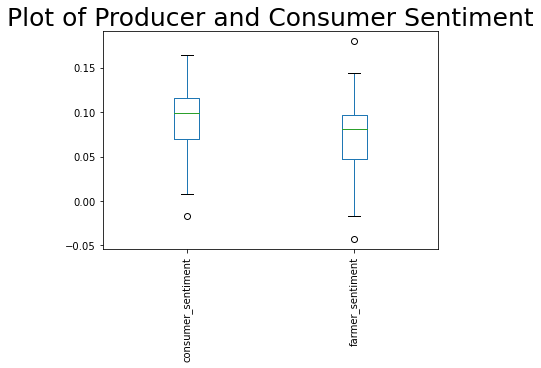

In [11]:
allSentiment[['consumer_sentiment', 'farmer_sentiment']].plot(kind='box', rot=90)
plt.title('Plot of Producer and Consumer Sentiment', fontsize=25);

In [12]:
allSentiment.iplot(kind='hist',
             subplots=True, subplot_titles=True, legend=False,
             bins=25,);

In [13]:
allSentiment.pct_change().iplot(kind='hist',
             subplots=True, subplot_titles=True, legend=False,
             bins=25,);

# Statistics on Sentiment

Below you can see that the P-Value is less that alpha there the null hypothesis is rejected as there is statistical significance between the datasets.

In [14]:
Stats.distribution(allSentiment[['consumer_sentiment', 'farmer_sentiment']])

consumer_sentiment normal distribution, pvalue = 0.111996

farmer_sentiment normal distribution, pvalue = 0.724346

Reject Null Hypothesis P-Value 0.0183


Ttest_indResult(statistic=2.41198739455647, pvalue=0.018345568409279388)

In [15]:
Stats.distribution(allSentiment)

consumer_sentiment normal distribution, pvalue = 0.111996

farmer_sentiment normal distribution, pvalue = 0.724346

steak_prices not normal distribution, pvalue = 0.000570

Accept Null Hypothesis P-Value 0.3679


KruskalResult(statistic=2.0, pvalue=0.36787944117144245)

# Correlations of Sentiment and Bovine Meat Prices

There is negative correlation between steak prices and sentiment of both farmers and consumers.  Sentiment between farmers and consumers is slightly positive correlation.

In [16]:
allSentiment.corr().style.background_gradient(cmap='coolwarm')

,consumer_sentiment,farmer_sentiment,steak_prices
consumer_sentiment,1.000000,0.112268,-0.285481
farmer_sentiment,0.112268,1.000000,-0.390723
steak_prices,-0.285481,-0.390723,1.000000


<AxesSubplot:xlabel='consumer_sentiment', ylabel='steak_prices'>

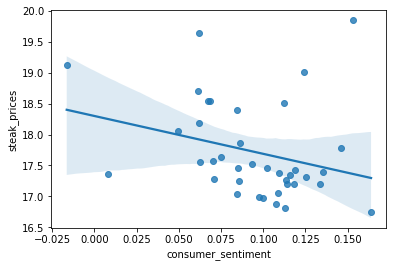

In [17]:
# use the function regplot to make a scatterplot
sns.regplot(x=allSentiment["consumer_sentiment"], y=allSentiment["steak_prices"])

<AxesSubplot:xlabel='farmer_sentiment', ylabel='steak_prices'>

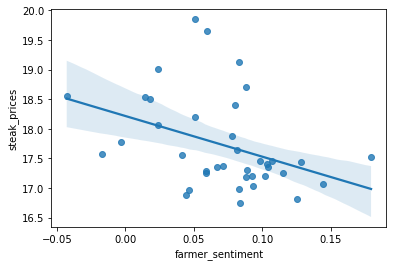

In [18]:
# use the function regplot to make a scatterplot
sns.regplot(x=allSentiment["farmer_sentiment"], y=allSentiment["steak_prices"])

<AxesSubplot:xlabel='farmer_sentiment', ylabel='consumer_sentiment'>

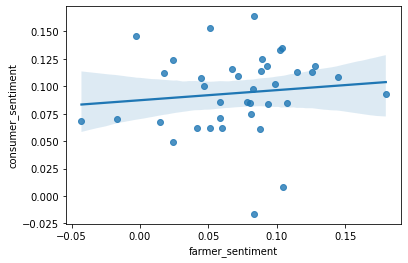

In [19]:
# use the function regplot to make a scatterplot
sns.regplot(x=allSentiment["farmer_sentiment"], y=allSentiment["consumer_sentiment"])

In [20]:
# Save sentiment Analysis to spreadsheet
allSentiment.to_csv('data/sentimentanalysis.csv')